In [1]:
import re
from stop_words import get_stop_words
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs


In [2]:
file = open('Clean_diaries.txt')
clean_diaries = file.read()
file.close()

In [3]:
reg = '\\n\d{4}\\n'
list_of_years = re.findall(reg, clean_diaries)

In [4]:
list_of_diaries_by_year = re.split(reg, clean_diaries)       

In [5]:
len_of_diaries = []
for diary in list_of_diaries_by_year:
    len_of_diaries.append(len(diary.split()))

In [6]:
dolya_of_diaries = []
for len_of_diary in len_of_diaries:
    dolya_of_diaries.append(len_of_diary/sum(len_of_diaries))

In [7]:
dolya_of_diaries

[0.12778940541815287,
 0.13126787135571735,
 0.14014090734899626,
 0.15709105916339947,
 0.136721398461221,
 0.12997081626035434,
 0.041063585178197685,
 0.020634967426229993,
 0.03339916870559797,
 0.010435397812693453,
 0.011614538808478023,
 0.05987088406096159]

In [8]:
dict_with_len = {i + 1928: len(diary.split()) for i, diary in enumerate(list_of_diaries_by_year)}

In [9]:
dict_with_len

{1928: 4335,
 1929: 4453,
 1930: 4754,
 1931: 5329,
 1932: 4638,
 1933: 4409,
 1934: 1393,
 1935: 700,
 1936: 1133,
 1937: 354,
 1938: 394,
 1939: 2031}

In [10]:
pd.Series(dict_with_len).to_csv('DF_with_len_of_diaries.csv')

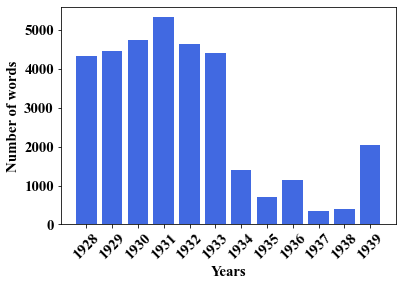

In [11]:
font_args = {'fontname':'Times New Roman', 'size': '15'}

plt.bar(dict_with_len.keys(), dict_with_len.values(), color='royalblue')
plt.xticks(range(1928, 1940),rotation=45, **font_args)
plt.yticks(range(0, 6000, 1000), **font_args)
plt.xlabel('Years', **font_args)
plt.ylabel('Number of words', **font_args)
plt.savefig('Num_of_words.png', bbox_inches="tight")

In [12]:
quantity_of_people = []
for i in range(1928,1940):
    file = open('Table_of_attrs_{}.csv'.format(i))
    table_of_attrs = pd.read_csv(file)
    quantity_of_people.append(len(table_of_attrs))

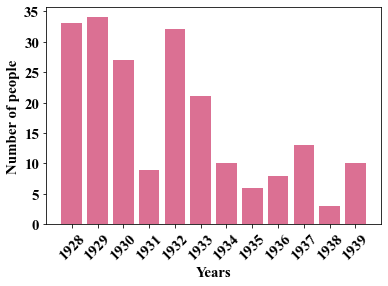

In [13]:
dic_quantity_of_people = {i + 1928: quantity_of_people[i] for i, quantity_of_people[i] \
                          in enumerate(quantity_of_people)}

font_args = {'fontname':'Times New Roman', 'size': '15'}

plt.bar(dic_quantity_of_people.keys(), dic_quantity_of_people.values(), color='palevioletred')
plt.xticks(range(1928, 1940),rotation=45, **font_args)
plt.yticks(range(0, 40, 5), **font_args)
plt.xlabel('Years', **font_args)
plt.ylabel('Number of people', **font_args)
plt.savefig('Num_of_people.png', bbox_inches="tight")

In [14]:
quantity_of_meetings = []

for x in range(1928, 1940):
    file = open('Processed_Diary-{}.xml'.format(x))
    diary = file.read()
    soup = bs(diary, 'xml')
    all_notes = soup.find_all('meeting')
    quantity_of_meetings.append(len(all_notes))

In [15]:
quantity_of_meetings

[47, 41, 20, 16, 29, 29, 12, 8, 4, 9, 2, 14]

In [16]:
np.mean(quantity_of_meetings)

19.25

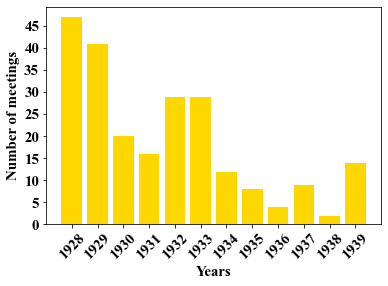

In [17]:
dic_quantity_of_meetings = {i + 1928: quantity_of_meetings[i] for i, quantity_of_meetings[i] \
                          in enumerate(quantity_of_meetings)}
font_args = {'fontname':'Times New Roman', 'size': '15'}

plt.bar(dic_quantity_of_meetings.keys(), dic_quantity_of_meetings.values(), color='gold')
plt.xticks(range(1928, 1940),rotation=45, **font_args)
plt.yticks(range(0, 50, 5), **font_args)
plt.xlabel('Years', **font_args)
plt.ylabel('Number of meetings', **font_args)
plt.savefig('Num_of_meetings.png',bbox_inches="tight")

In [ ]:
# col_list = ['Source', 'Target', 'Weight']
# for i in range(1928,1940):
#     file = open('Table_with_Bunins_{}.csv'.format(i))
#     table_of_meetings = pd.read_csv(file, usecols=col_list, sep='\t')
#     quantity_of_meetings.append(sum(table_of_meetings['Weight']))
# #     quantity_of_meetings.append(len(table_of_meetings))

<ipython-input-159-c305dd4209a2>:8: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  plt.legend(patches, labels = dict_with_len.keys(), loc='best')


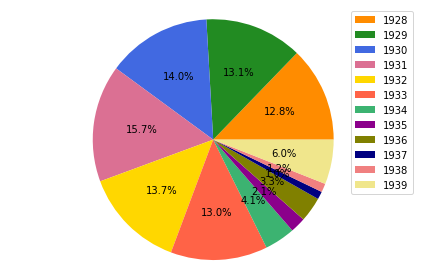

In [159]:
colors = ['darkorange','forestgreen','royalblue',\
          'palevioletred','gold','tomato','mediumseagreen',\
          'darkmagenta','olive','navy','lightcoral','khaki']

patches= plt.pie(dict_with_len.values(),\
                                  radius = 5, colors=colors,\
                                  autopct='%1.1f%%')
plt.legend(patches, labels = dict_with_len.keys(), loc='best')
plt.axis('equal')
plt.tight_layout()
plt.show()